(20, 1) (20, 1)


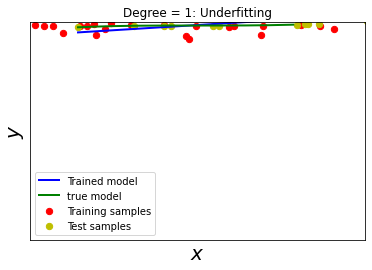

[[-806.26100778  303.13104953]]
(20, 1) (20, 1)


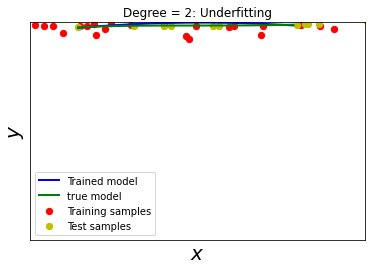

[[201.51630893 254.25390464 -40.0204174 ]]
(20, 1) (20, 1)


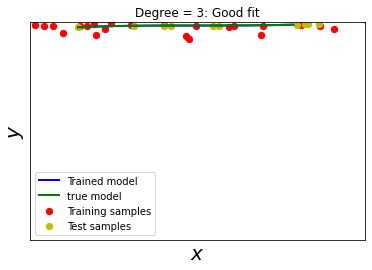

[[-68.07469843  77.98249437 -26.98445474   3.00076172]]
(20, 1) (20, 1)


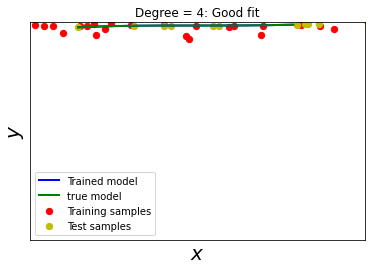

[[-6.89691770e+01  7.81203165e+01 -2.68817573e+01  2.99593029e+00
  -1.14187083e-03]]
(20, 1) (20, 1)


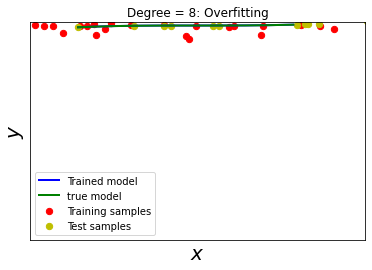

[[-6.75115305e+01  7.81159062e+01 -2.73418115e+01  3.02147132e+00
   2.28861560e-02 -1.28614629e-03 -3.72139090e-04  1.13206876e-05
   1.89690532e-06]]
(20, 1) (20, 1)


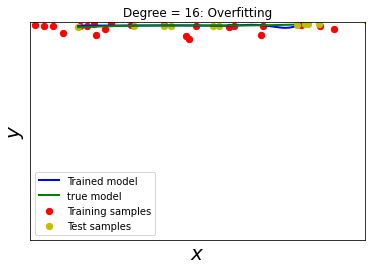

[[-8.14397057e-03  2.60010318e-01 -4.15037236e-02  1.08104492e+00
  -2.83790039e-01  4.08093562e+00 -1.40446246e+00 -4.97400004e-01
   1.74786525e-01  2.33034108e-02 -8.44472244e-03 -4.54077432e-04
   1.87244970e-04  2.88168396e-06 -1.81487290e-06 -1.93888072e-09
   6.34247902e-09]]


In [7]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
np.random.seed(1)

from sklearn import datasets, linear_model

N = 30
N_test = 20
X = np.random.randn(N, 1)*5
y = 3*(X-2)*(X-3)*(X-4) + 10*np.random.rand(N, 1)

X_test = (np.random.randn(N_test, 1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d= 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept= False) # fit in tercept = false for calculating the bias
    regr.fit(Xbar, y)
    
    w = regr.coef_
    #display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint= True)
    y0 = np.zeros_like(x0)
    ytrue = 3*(x0-2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i
        
    #draw the fitting line
    plt.scatter(X.T, Y.T, c = 'r', s= 40, label = "Training samples")
    
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = "Test samples")
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model") 
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "true model")
    
    plt.xticks([])
    plt.yticks([])
    
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)